In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random

#### **1. Generate the datasets A and B in R2 with each of them consisting 2000 data points from normal distribution. The dataset A and B has been drawn from the N (μ1, Σ1 ) and N(μ2, Σ2 ) . Let us fix the μ1 = [-1,1] and μ2 = [2,2]. Separate the 250 data points from each classes as testing set. Plot the optimal Bayesian decision boundary for following cases.**
**(i) Σ1 = Σ2 = [[2, 0],[0, 2]]**

**(ii) Σ1 = Σ2 = [[2, 1],[1 2]]**

In [ ]:
def Bayesian_Classifier(mu1,mu2,sigma1,sigma2,p_w1,p_w2):
    '''
    mu1         :  Mean of data A
    mu2         :  Mean of data B
    sigma1      :  cov matrix for data A
    sigma2      :  cov matrix for data B
    p_w1        :  prior probability for data A
    p_w2        :  prior probability for data B
    '''
    if sigma1[0][1]==sigma1[1][0]==0 and sigma1[0][0]==sigma1[-1][-1] and sigma1.any() == sigma2.any(): # Case 1
        s = sigma1[0][0]
        W = (mu1 - mu2)
        x0 = (1/2)*(mu1 + mu2) - (s*(mu1-mu2)/(np.linalg.norm(mu1-mu2)**2))*np.log(p_w1/p_w2)
    elif sigma1.any() == sigma2.any(): # Case 2
        sigma = sigma1.copy()
        sigma_inv = np.linalg.inv(sigma)
        W = sigma_inv @ (mu1 - mu2)
        x0 = (1/2)*(mu1 + mu2) - ((mu1 - mu2)/((mu1-mu2).T @ sigma_inv @ (mu1-mu2)))*(np.log(p_w1/p_w2))
    else:
        print('Case 3')
    return W,x0

In [ ]:
def plot_boundary_by_BC(A,B,W,x0):
    '''
    A : data of class 1
    B : data of class 2
    W , X0 : weights
    '''
    plt.scatter(A[0], A[1], s=15, color='sienna', alpha=0.4, linewidths=0.25)
    plt.scatter(B[0], B[1], s=15, color='turquoise', alpha=0.4, linewidths=0.25)
    x = np.linspace(-2,3,10000)
    y = ((W.T @ x0) - (W[0] * x)) / W[1]
    plt.plot(x,y,color = 'black')
    plt.legend(loc='best', fontsize=9)
    plt.title('Bayesian Classification')
    plt.show()

In [ ]:
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])

In [ ]:
# Case 1
sigma11 = np.array([[2,0],[0,2]])
sigma12 = np.array([[2,0],[0,2]])

In [ ]:
np.random.seed(15)
A1 = np.random.multivariate_normal(mean=mu1, cov=sigma11, size=2000)
B1 = np.random.multivariate_normal(mean=mu2, cov=sigma12, size=2000)

In [ ]:
random.shuffle(A1)
train_A1 = A1[:1750].T                               
test_A1 = A1[1750:].T

random.shuffle(B1)
train_B1 = B1[:1750].T                               
test_B1 = B1[1750:].T

In [ ]:
W1,x01 = Bayesian_Classifier(mu1,mu2,sigma11,sigma12,0.5,0.5)

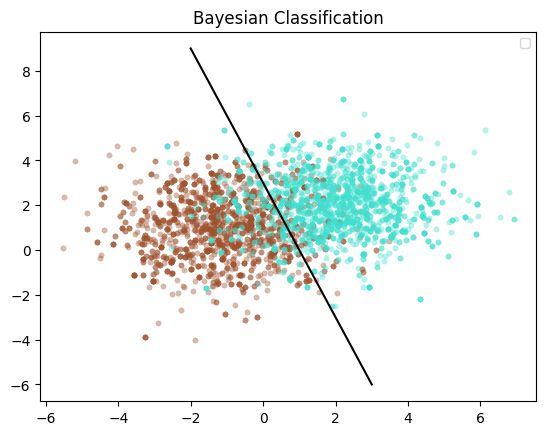

In [ ]:
plot_boundary_by_BC(train_A1,train_B1,W1,x01)

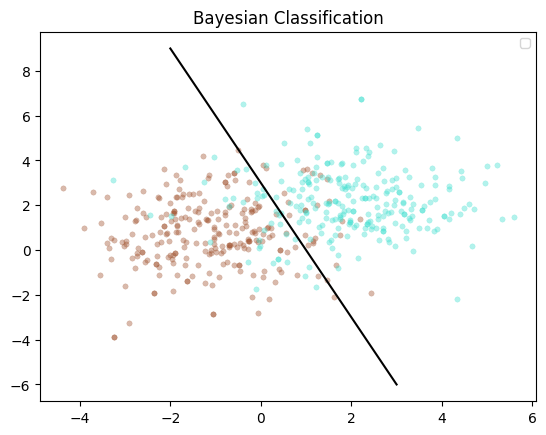

In [ ]:
plot_boundary_by_BC(test_A1,test_B1,W1,x01)

In [ ]:
# Case 2
sigma21 = np.array([[2,1],[1,2]])
sigma22 = np.array([[2,1],[1,2]])

In [ ]:
np.random.seed(15)
A2 = np.random.multivariate_normal(mean=mu1, cov=sigma21, size=2000)
B2 = np.random.multivariate_normal(mean=mu2, cov=sigma22, size=2000)

In [ ]:
random.shuffle(A2)
train_A2 = A2[:1750].T                               
test_A2 = A2[1750:].T

random.shuffle(B2)
train_B2 = B2[:1750].T                               
test_B2 = B2[1750:].T

In [ ]:
W2,x02 = Bayesian_Classifier(mu1,mu2,sigma21,sigma22,0.5,0.5)

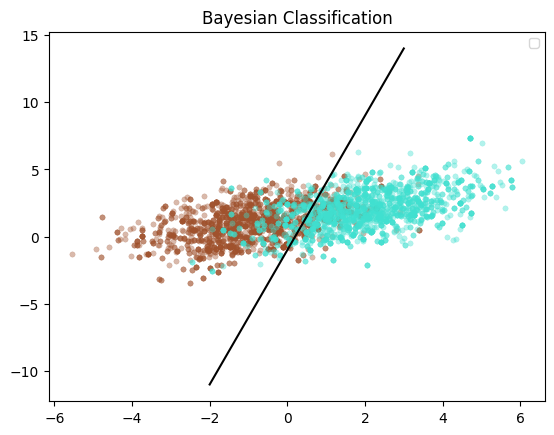

In [ ]:
plot_boundary_by_BC(train_A2,train_B2,W2,x02)

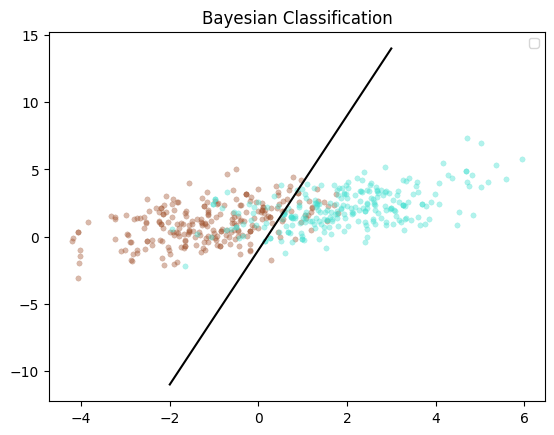

In [ ]:
plot_boundary_by_BC(test_A2,test_B2,W2,x02)

#### **2. Write a function implementing the logistic regression model using the gradient descentmethod using the dataset generated for question 1. Plot the decision boundary obtained by the logistic regression. Compare it with the Bayesian decision boundary.**

In [ ]:
def get_X_and_Y(A,B):
    A = np.insert(A,A.shape[0],0,axis=0).T
    B = np.insert(B,B.shape[0],1,axis=0).T
    data = np.concatenate((A,B),axis=0)
    X = data[:,:-1]
    X = np.insert(X,0,1,axis=1)
    Y = data[:,-1]
    index = np.arange(len(Y))
    np.random.shuffle(index)
    X = X[index]
    Y = Y[index]
    return X,Y

In [ ]:
def sigmodial(z):
    return (1 / (1 + np.exp(-z)))

In [ ]:
def  logistic_regression(X, Y, alpha, epochs):  # X is matrix of input data and Y is output 
    W = np.zeros(X.shape[1])
    for i in range(epochs):
        z = X @ W
        u = sigmodial(z)
        W = W - (alpha*(X.T @ (u - Y)))
    return W

In [ ]:
def plot_logistic(A,B,W): # only for bivariate data
    plt.figure(figsize=(10,6))
    plt.scatter(A[0], A[1], s=15, color='sienna', alpha=0.4, linewidths=0.25, label='x1 class')
    plt.scatter(B[0], B[1], s=15, color='turquoise', alpha=0.3, linewidths=0.25, label='x2 class')

    x = np.linspace(-1,2,10000)
    y = (-W[1]*x - W[0])/W[2]
    plt.plot(x,y,color='black', label='({}) + ({}) * x1 + ({}) * x2'.format(round(W[0], 2), round(W[1], 2), round(W[2], 2)))
    plt.legend(loc='best', fontsize=6)
    plt.title('Logistic Regression')
    plt.show()

In [ ]:
def compare_plot(A,B,W,x0,W2): # only for bivariate data
    plt.scatter(A[0], A[1], s=15, color='sienna', alpha=0.4, linewidths=0.25, label='x1 class')
    plt.scatter(B[0], B[1], s=15, color='turquoise', alpha=0.3, linewidths=0.25, label='x2 class')
    x = np.linspace(-3,3,10000)
    y = ((W.T @ x0) - (W[0] * x)) / W[1]
    z = (-W2[1]*x - W2[0])/W2[2]
    
    plt.plot(x,y,color = 'black', label='Bayesian')
    plt.plot(x,z,color='blue', label='logistic')
    plt.legend(loc='best', fontsize=6)
    plt.title('logistic vs Bayesian')
    plt.show()

In [ ]:
# Case 1
train_x1, train_y1 = get_X_and_Y(train_A1,train_B1)

In [ ]:
W_logistic1 = logistic_regression(train_x1, train_y1, 0.01, 22000)

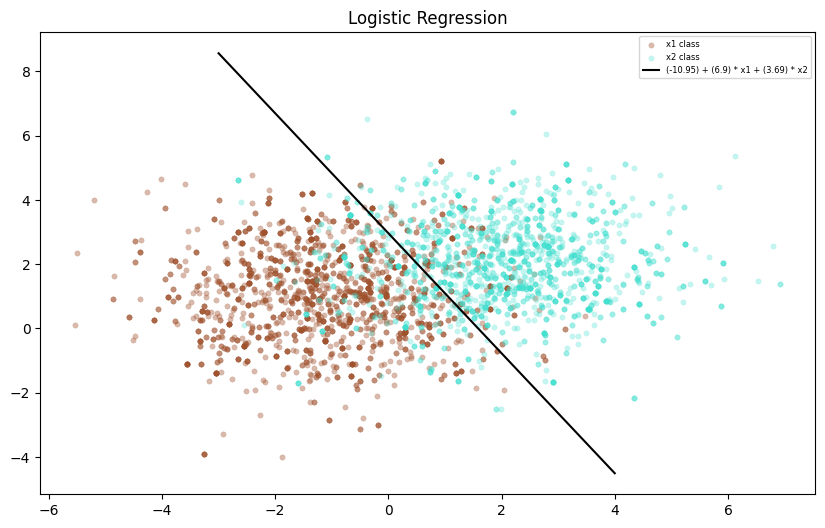

In [ ]:
plot_logistic(train_A1,train_B1,W_logistic1)

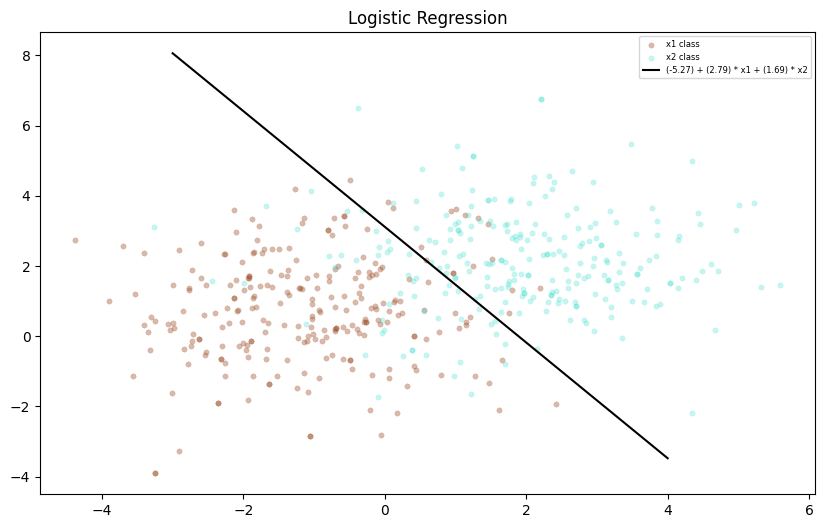

In [ ]:
plot_logistic(test_A1,test_B1,W_logistic)

In [ ]:
# Case 2
train_x2, train_y2 = get_X_and_Y(train_A2,train_B2)

In [ ]:
W_logistic2 = logistic_regression(train_x2, train_y2, 0.001, 22000)

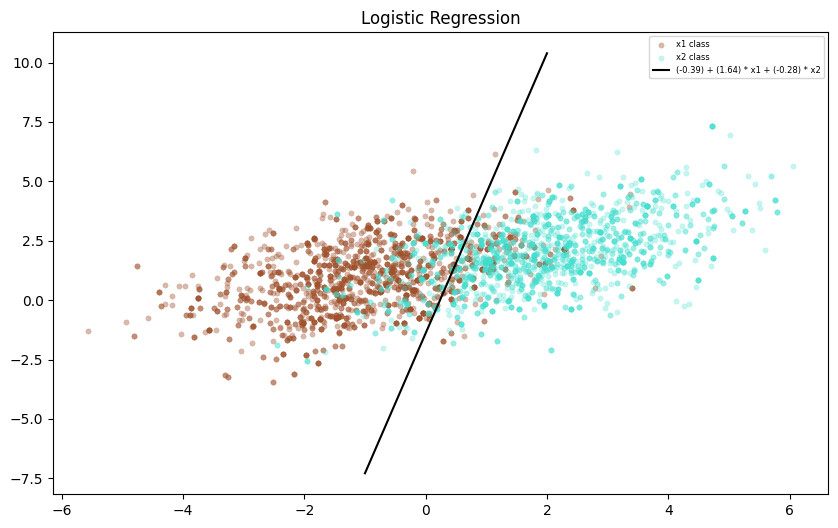

In [ ]:
plot_logistic(train_A2,train_B2,W_logistic2)

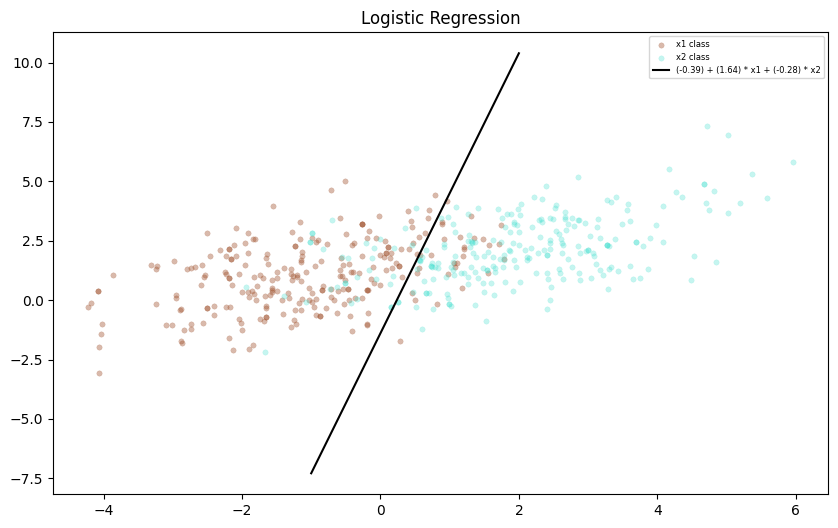

In [ ]:
plot_logistic(test_A2,test_B2,W_logistic2)

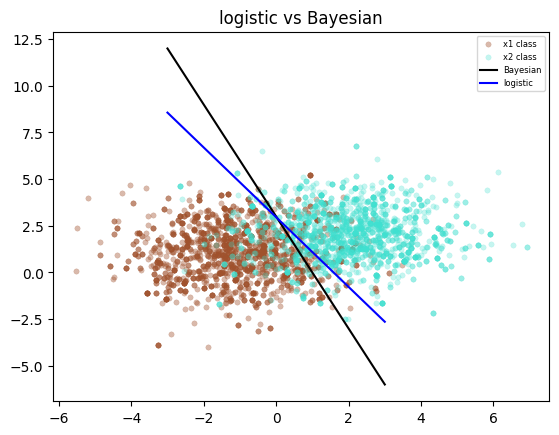

In [ ]:
compare_plot(train_A1,train_B1,W1,x01,W_logistic1)

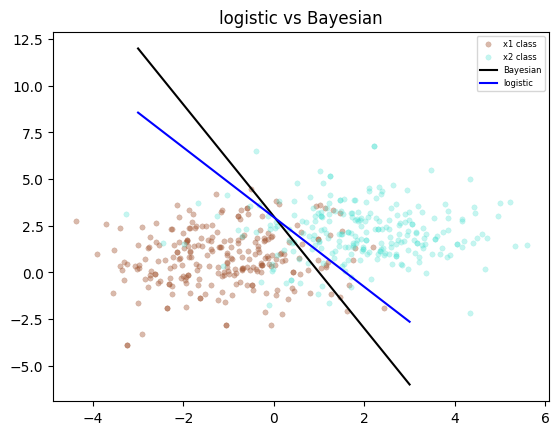

In [ ]:
compare_plot(test_A1,test_B1,W1,x01,W_logistic1)

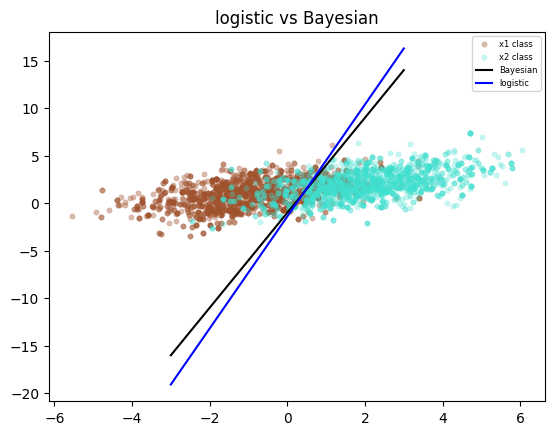

In [ ]:
compare_plot(train_A2,train_B2,W2,x02,W_logistic2)

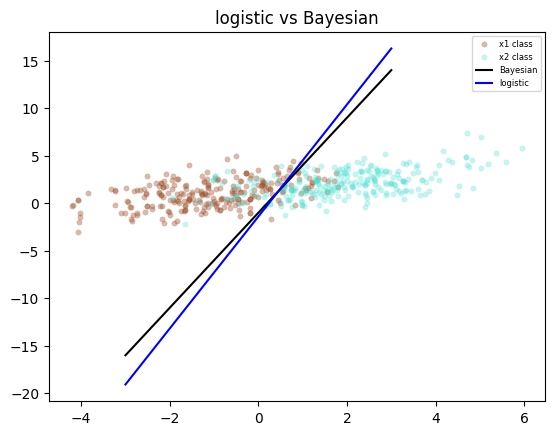

In [ ]:
compare_plot(test_A2,test_B2,W2,x02,W_logistic2)

#### **3. Consider the Iris dataset. The dataset contains three types of flower described by the four features. Consider only the data points with label 1 and 2. Divide the dataset into training and testing set in the ration 8:1:1. Use the training set to train the logistic regression model. Use the validation set to tune the parameter values of your model. Finally obtain the accuracy on the test set.**

In [ ]:
def gradient_logistic(X,Y,u,W,Lembda):
    W0 = W.copy()
    W0[-1] = 0
    grad = Lembda*W0 + (X.T @ (u - Y))
    return grad

In [ ]:
def  Regularized_logistic_regression(X, Y, alpha, Lembda, epochs):  # X is matrix of input data and Y is output 
    W = np.zeros(X.shape[1])
    for i in range(epochs):
        z = X @ W
        u = sigmodial(z)
        W = W - alpha*(gradient_logistic(X,Y,u,W,Lembda))
    return W

In [ ]:
def classify(pred_y):
    lst = []
    for i in pred_y:
        if i < 0:
            lst.append(0)
        else:
            lst.append(1)
    return lst

In [ ]:
def accuracy_score(y, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            FN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy

In [ ]:
def Tune_Lembda(X,Y,alpha,set_of_Lembda,epochs):
    Opti_Acu = 0
    Opti_Lembda = 2**10
    for lem in set_of_Lembda:
        W = Regularized_logistic_regression(X,Y,alpha,lem,epochs)
        pred_Y = classify(X @ W)
        acu = accuracy_score(Y,pred_Y)
        if acu > Opti_Acu:
            Opti_Acu = acu
            Opti_Lembda = lem
    return Opti_Lembda

In [ ]:
iris_data = pd.read_excel('/content/Iris.xlsx')

In [ ]:
iris_data.shape

(150, 6)

In [ ]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_data = iris_data.drop(iris_data[iris_data['Species'] == 'Iris-versicolor'].index)
iris_data.drop('Id', inplace=True, axis=1)
iris_data.reset_index(inplace=True)
iris_data.drop('index', inplace=True, axis=1)

In [ ]:
iris_data['y'] = iris_data['Species'].map(lambda x: 1 if x == 'Iris-setosa' else 0)
iris_data.drop('Species', inplace=True, axis=1)
iris_data = iris_data.sample(frac=1).reset_index(drop=True)

In [ ]:
iris_data.shape

(100, 5)

In [ ]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,y
0,5.4,3.9,1.7,0.4,1
1,5.2,4.1,1.5,0.1,1
2,6.7,3.1,5.6,2.4,0
3,5.1,3.5,1.4,0.3,1
4,5.4,3.9,1.3,0.4,1


In [ ]:
train_data = iris_data[:int(0.8*len(iris_data))]                                    # 80% of iris_data for training
test_data = iris_data[int(0.8*len(iris_data)):int(0.9*len(iris_data))]              # 10% of iris_data for testing
val_data = iris_data[int(0.9*len(iris_data)):]                                      # 10% of iris_data for validation

In [ ]:
print('train shape : ', train_data.shape)
print('validation shape : ', val_data.shape)
print('test shape : ',test_data.shape)

train shape :  (80, 5)
validation shape :  (10, 5)
test shape :  (10, 5)


In [ ]:
# Train set
train_X = train_data.iloc[:, 0:len(train_data.columns)-1].to_numpy()
train_y = train_data.iloc[:, -1].to_numpy()
ones = np.ones(len(train_data))
train_X = np.insert(train_X, 0, ones, axis=1)

# Validation set
val_X = val_data.iloc[:, 0:len(val_data.columns)-1].to_numpy()
val_y = val_data.iloc[:, -1].to_numpy()
ones = np.ones(len(val_data))
val_X = np.insert(val_X, 0, ones, axis=1)

# Test set
test_X = test_data.iloc[:, 0:len(test_data.columns)-1].to_numpy()
test_y = test_data.iloc[:, -1].to_numpy()
ones = np.ones(len(test_data))
test_X = np.insert(test_X, 0, ones, axis=1)

In [ ]:
set_of_Lembda = [0.001,0.025,0.05,0.1,0.25,0.5,1]

In [ ]:
Lembda = Tune_Lembda(val_X,val_y,0.001,set_of_Lembda,100)

In [ ]:
Lembda

0.001

In [ ]:
W_R_logistic = Regularized_logistic_regression(train_X,train_y,0.001,0.001,100)

In [ ]:
test_pred_y = classify(test_X @ W_R_logistic)

In [ ]:
print('Test Acuuracy is',accuracy_score(test_y,test_pred_y))

Test Acuuracy is 1.0


#### **4. Learn about the different evaluation measure of a classification model namely Accuracy, Precision, Recall, Confusion matrix, F-Score and their significance. Write a brief note about them and submit it (Not less than 200 words). Compute all of them for problem 3.**

**Accuracy :** The accuracy score measures the proportion of correctly classified instances out of all instances. It is calculated as:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

where FP is the number of false positives and FN is the number of false negatives.

Accuracy is a useful metric when the classes in the dataset are balanced, meaning that each class has roughly the same number of instances. In this case, accuracy provides a quick and intuitive summary of the overall performance of the classification model.

However, when the classes are unbalanced, accuracy can be a misleading metric. For example, if the dataset contains 95% negative instances and only 5% positive instances, a model that always predicts negative will have an accuracy of 95%, even though it has completely failed to identify any positive instances. In such cases, other metrics such as precision, recall, and F1 score may be more informative.

**Precision :** Precision measures the proportion of true positives out of all positive predictions. It is calculated as:

Precision  = TP / (TP + FP) 

where TP is the number of true positives and FP is the number of false positives.

Precision is a useful metric when the cost of false positives is high. For example, in a medical diagnosis task, a false positive prediction could lead to unnecessary medical procedures, which can be expensive and risky for the patient. In such cases, high precision is desirable, as it minimizes the number of false positives.

**Recall :**  Recall measures the proportion of true positives out of all actual positive instances. It is calculated as:

Recall = TP / (TP + FN)

where TP is the number of true positive samples and FN is the number of false negative samples.

If the cost of false positives is low, but the cost of false negatives is high, recall may be a more important metric. For example, in a spam detection task, a false positive prediction may lead to an inconvenience, but a false negative prediction could result in important emails being missed. In such cases, high recall is desirable

**Confusion matrix :** A confusion matrix is a table that summarizes the performance of a classification algorithm.The confusion matrix is a 2x2 matrix that shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

Using the values in the confusion matrix, several metrics can be calculated to evaluate the performance of the classification model, including accuracy, precision, recall, and F1 score. 


**F2-Score :** 
The F-score is calculated as the harmonic mean of precision and recall, and it ranges from 0 to 1, with a higher value indicating better performance. The formula for calculating the F-score is as follows:

F-score = 2 * (precision * recall) / (precision + recall)

Here, precision is the ratio of true positives to the total number of positive predictions made by the model, and recall is the ratio of true positives to the total number of actual positive samples.

The significance of the F-score lies in its ability to provide a single metric for evaluating the overall performance of a classification model. Unlike accuracy, which can be misleading when the dataset is imbalanced, the F-score considers both precision and recall and gives a more accurate picture of the model's performance. For example, in a medical diagnosis task, a high F-score indicates that the model is correctly identifying most cases of a particular disease, while minimizing the number of false positives.

In [ ]:
def accuracy_score(y, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y[i] == 0 and y_pred[i] == 1:
            FP += 1
        else:
            FN += 1

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return accuracy

In [ ]:
def precision_score(y, y_pred):
    TP = 0
    FP = 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y[i] == 1:
            TP += 1
        elif y_pred[i] == 1 and y[i] == 0:
            FP += 1

    precision = TP / (TP + FP)

    return precision

In [ ]:
def recall_score(y, y_pred):
    TP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y[i] == 1:
            TP += 1
        elif y_pred[i] == 0 and y[i] == 1:
            FN += 1

    recall = TP / (TP + FN)

    return recall

In [ ]:
def confusion_matrix(y, y_pred):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            TP += 1
        elif y[i] == 0 and y_pred[i] == 0:
            TN += 1
        elif y[i] == 0 and y_pred[i] == 1:
            FP += 1
        elif y[i] == 1 and y_pred[i] == 0:
            FN += 1
    
    return TP, TN, FP, FN

In [ ]:
def F1_score(y, y_pred):
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1 and y[i] == 1:
            TP += 1
        elif y_pred[i] == 1 and y[i] == 0:
            FP += 1
        elif y_pred[i] == 0 and y[i] == 1:
            FN += 1

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = 2 * precision * recall / (precision + recall)

    return F1

In [ ]:
print('Accuracy score : ', accuracy_score(test_y, test_pred_y))
print('Precision score : ', precision_score(test_y, test_pred_y))
print('Recall score : ', recall_score(test_y, test_pred_y))
print('F1 score : ', F1_score(test_y, test_pred_y))

Accuracy score :  1.0
Precision score :  1.0
Recall score :  1.0
F1 score :  1.0


In [ ]:
TP,TN,FP,FN = confusion_matrix(test_y, test_pred_y)
np.array([[TP, FP], [FN, TN]])

array([[6, 0],
       [0, 4]])